#### import data and scripts

In [60]:
import os
import sys
sys.path.append('C:/Users/user/Documents/Code/Studing-Machine-Learning/scripts')
import pandas as pd

from perceptron import Perceptron


In [61]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### test perceptron

In [62]:
import matplotlib.pyplot as plt
import numpy as np

In [63]:
# made binary the tada
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa',-1, 1)

# extract sepal lenght and petal lenght
X = df.iloc[0:100, [0,2]].values

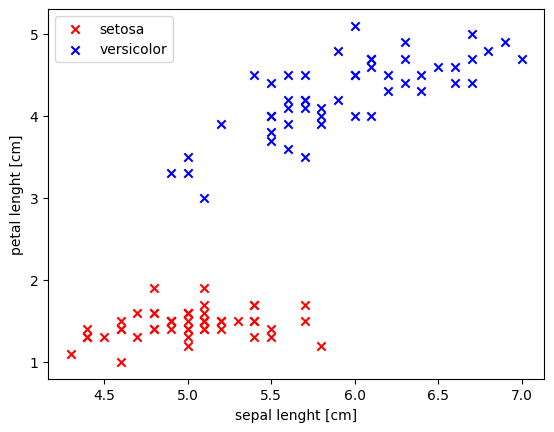

In [64]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='x', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor') # manual cuts 0:50 and 50:100
plt.xlabel('sepal lenght [cm]')
plt.ylabel('petal lenght [cm]')
plt.legend(loc='upper left')
plt.show()

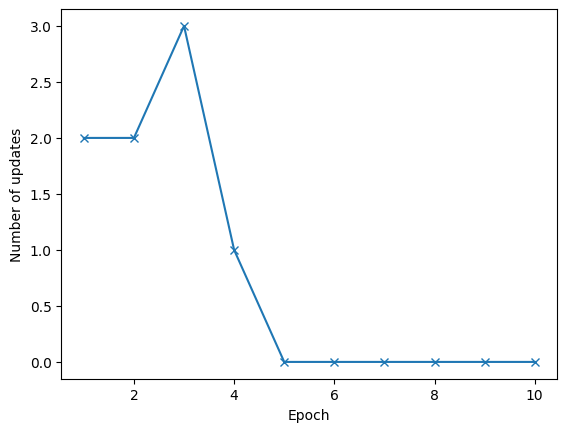

In [65]:
# train perceptron
ppn = Perceptron(eta=0.001, niter=10)
ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='x')
plt.xlabel('Epoch')
plt.ylabel('Number of updates')
plt.show()


In [66]:
ppn.w_ #the petal's length is the most important feature to clasificate the tipology of flower

array([ 0.00096714, -0.00998264,  0.02067689])

In [67]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

C:\Users\user\AppData\Local\Temp\ipykernel_6980\1277464609.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


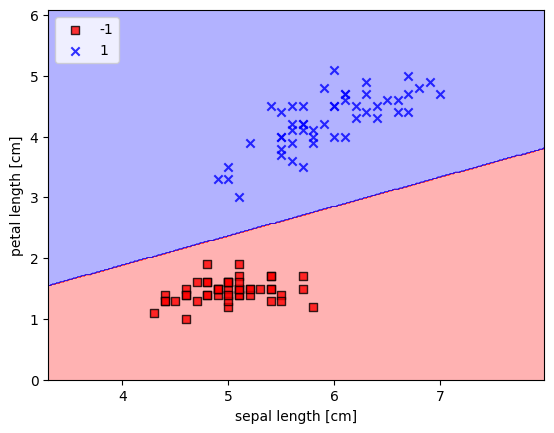

In [68]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

### Adaptative linear neurons and the convergence of learning -- Adaline

Cost ada1 =  [51.08122709777622, 3212.001733063833, 5006791.287179796, 7811818375.78158, 12188352557082.277, 1.9016819254863856e+16, 2.967090202540118e+19, 4.629388412448569e+22, 7.2229813084097865e+25, 1.1269622320163613e+29]
Cost ada2 =  [51.08122709777622, 48.734405003475466, 47.268121538341724, 46.127493074312454, 45.11577153141929, 44.16300470536643, 43.244135928281686, 42.350009099392544, 41.47710358023412, 40.62389994660111]


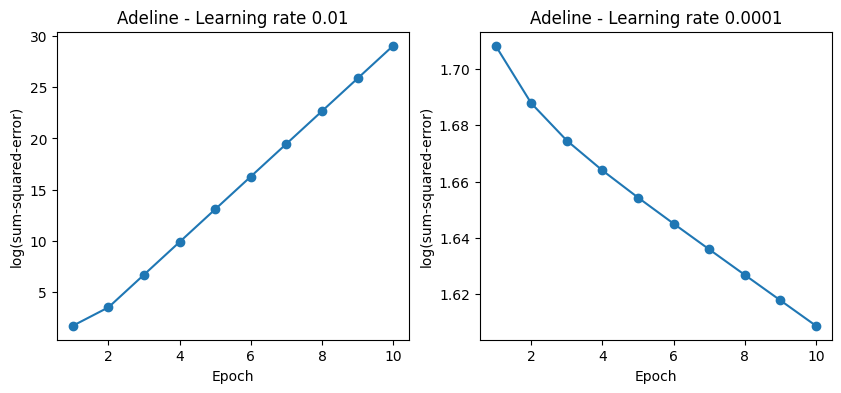

In [77]:
from adalinegd import AdalineGD

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
print('Cost ada1 = ', ada1.cost_)
ax[0].plot(range(1,len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('log(sum-squared-error)')
ax[0].set_title('Adeline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
print('Cost ada2 = ', ada2.cost_)
ax[1].plot(range(1,len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('log(sum-squared-error)')
ax[1].set_title('Adeline - Learning rate 0.0001')

plt.show()